In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

In [2]:
from pytorchvideo.data import Kinetics, RandomClipSampler
from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomResizedCrop,
    Div255
)

from torchvision.transforms import (
    Compose,
    RandomHorizontalFlip
)

import sys  
sys.path.insert(1, '../utils')
from random_temporal_subsample import RandomTemporalSubsample

/Users/aweers/git/dd2412_project/env/lib/python3.10/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


The toy videos used here can be quickly created by executing the script `utils/create_framenumber_video.py`. 

In [15]:
# Preprocessing follows SimMAE where specified and MAE otherwise

repeated_sampling_factor = 4

# Normalize is deactivated for this notebook for better visualization
transform = Compose(
    [
    ApplyTransformToKey(
        key="video",
        transform=Compose(
            [
            RandomTemporalSubsample(4, 48, repeated_sampling=repeated_sampling_factor),
            RandomResizedCrop(224, 224, scale=(0.2, 1.0), aspect_ratio=(1.0, 1.0), interpolation='bilinear'),
            Div255(),
            #Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            #RandomHorizontalFlip(p=0.5)
            ]
        ),
        ),
    ]
)
fps = 30
clip_duration = 48 / fps + 0.0001 # 48 frames at 30 fps

# example videos to validate random sampling
data = Kinetics("../framenumbers/", clip_sampler=RandomClipSampler(clip_duration=clip_duration), decode_audio=False, transform=transform)
data.num_videos

20

In [16]:
batch_size = 8
dloader = torch.utils.data.DataLoader(
        data,
        batch_size=batch_size,
        num_workers=0
    )

torch.Size([8, 3, 5, 224, 224])


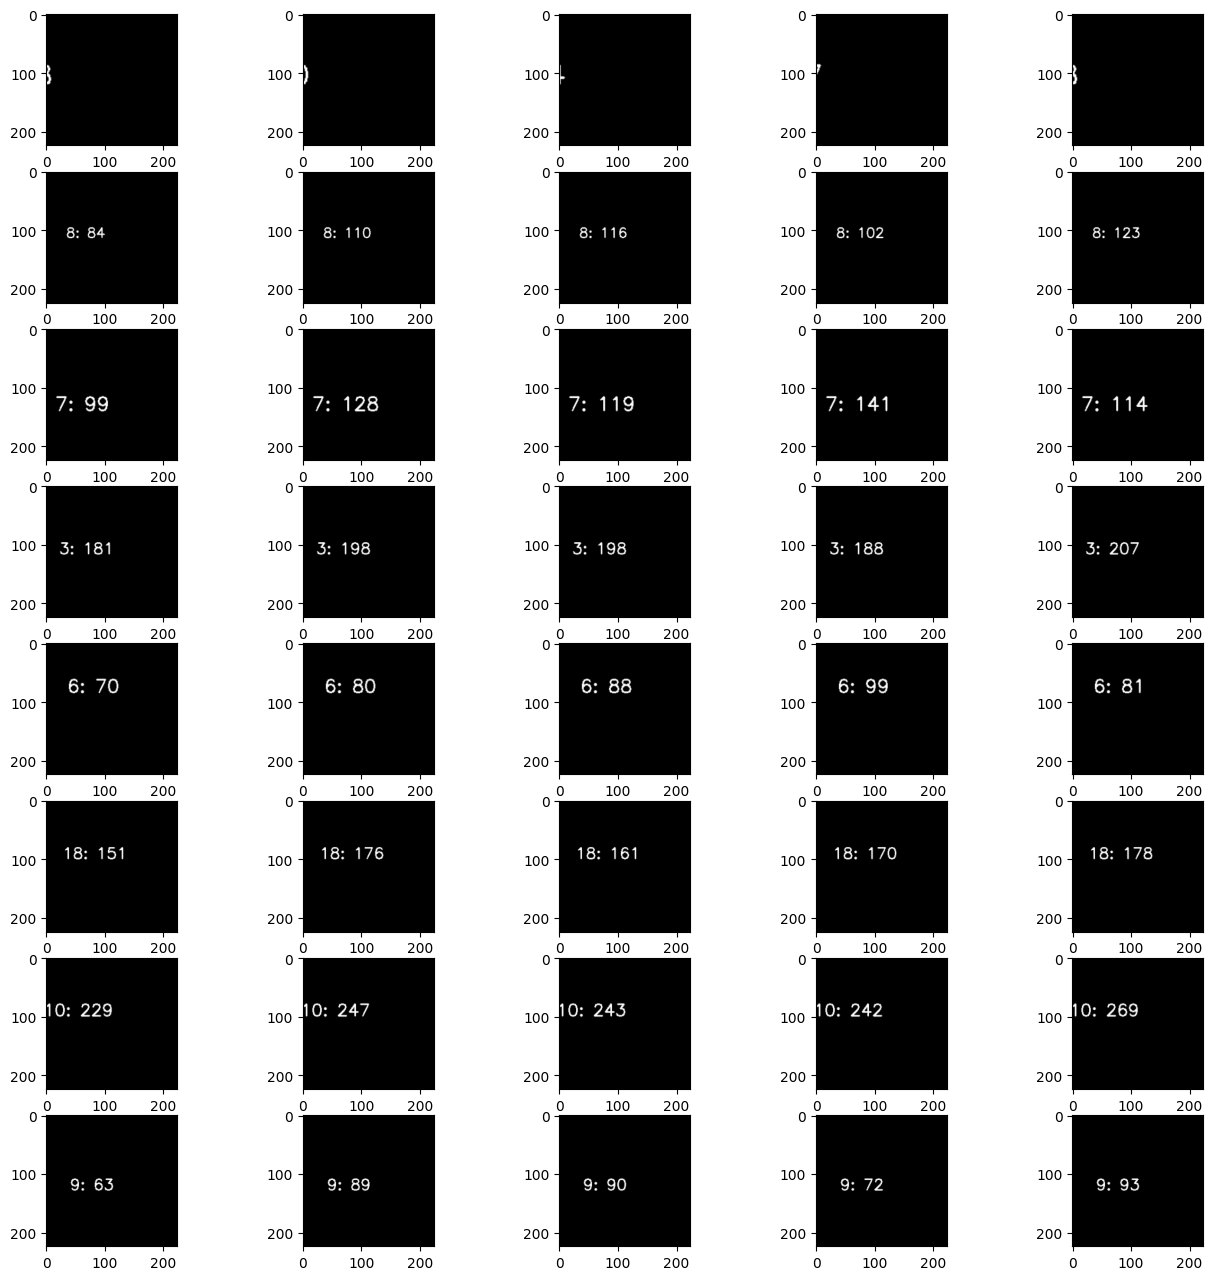

In [18]:
# this toy example validates empirically that our preprocessing pipeline
# works as expected, e.g. that the random temporal subsampling is working,
# that the random resized crop is working, and all preprocessing is applied 
# to both frames in the video

for batch in dloader:
    # shape: [batch, color, time, height, width]
    print(batch['video'].shape)
    
    plt.figure(figsize=(16, 16))
    for i in range(batch_size):
        for j in range(repeated_sampling_factor+1):
            plt.subplot(8, repeated_sampling_factor+1, (repeated_sampling_factor+1)*i + j + 1)
            plt.imshow(batch['video'][i, :, j].permute(1, 2, 0))

    break

1365
torch.Size([8, 3, 5, 224, 224])


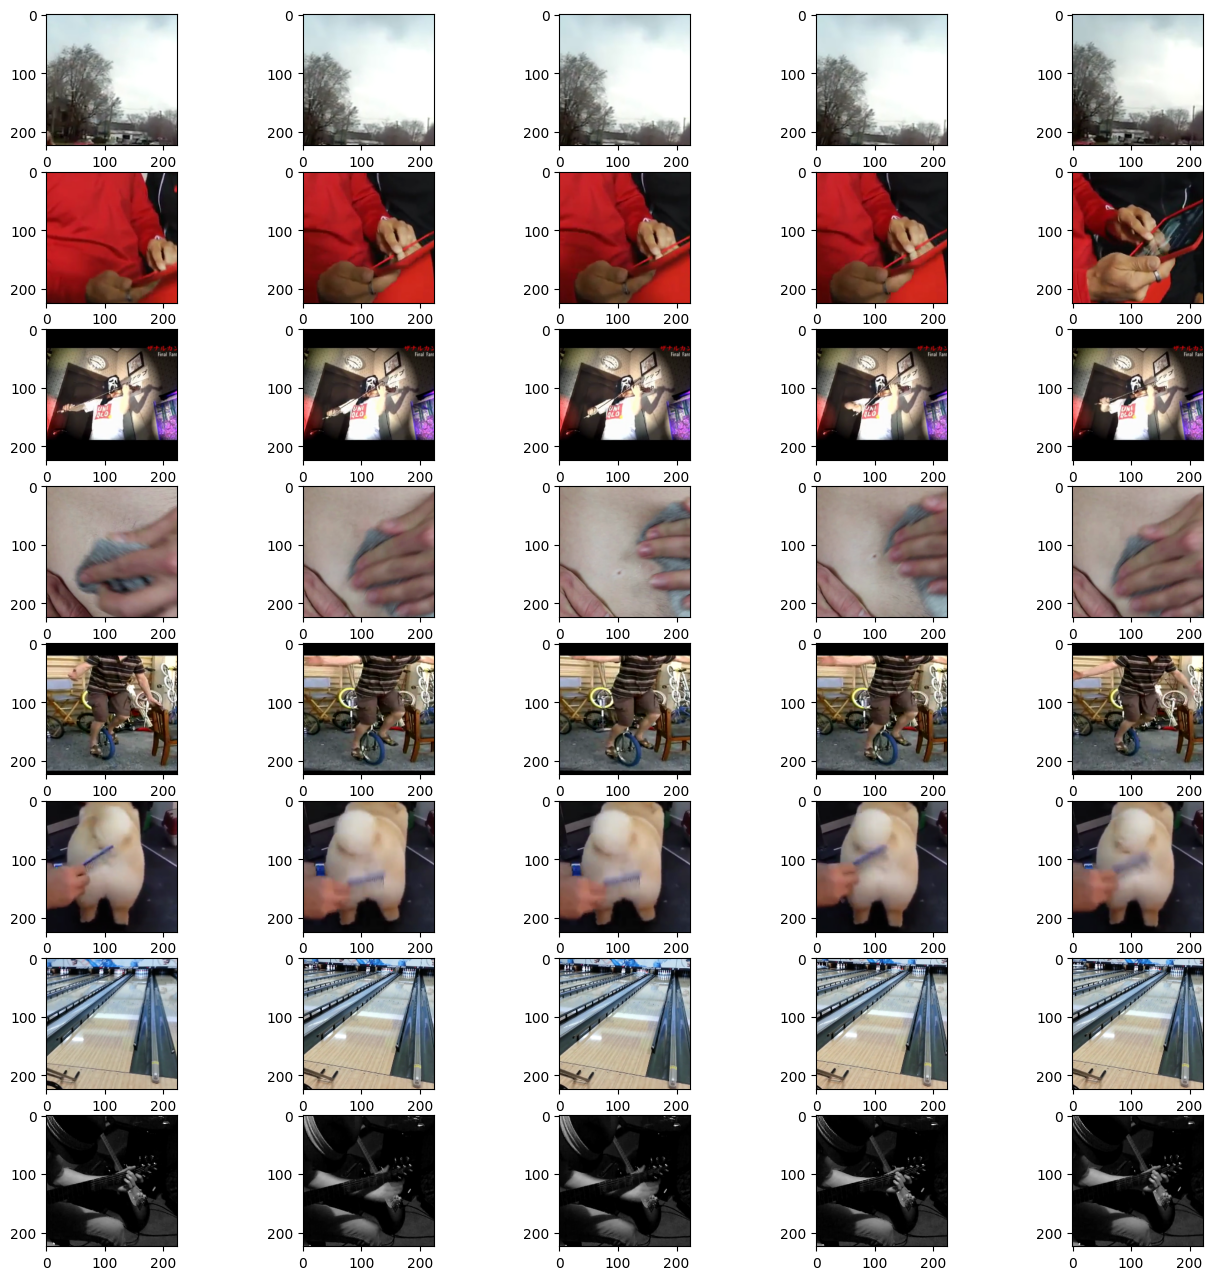

In [20]:
# real examples
data = Kinetics("../data/", clip_sampler=RandomClipSampler(clip_duration=clip_duration), decode_audio=False, transform=transform)
print(data.num_videos)

dloader = torch.utils.data.DataLoader(
        data,
        batch_size=batch_size,
        num_workers=0
    )

for batch in dloader:
    # shape: [batch, color, time, height, width]
    print(batch['video'].shape)
    
    plt.figure(figsize=(16, 16))
    for i in range(batch_size):
        for j in range(repeated_sampling_factor+1):
            plt.subplot(8, repeated_sampling_factor+1, (repeated_sampling_factor+1)*i + j + 1)
            plt.imshow(batch['video'][i, :, j].permute(1, 2, 0))

    break